In [ ]:
from keras.datasets               import cifar100
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 
from tensorflow.keras.optimizers  import SGD
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image             import imread

In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv
danhsach = ['Cuc','ThuocDuoc','HoaMatTroi','VanTho']
dir_train = '/content/drive/MyDrive/kiem tra' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in danhsach:
    path = os.path.join(dir,i)
    index_label = danhsach.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150)) # độ phân giải tùy ae chọn nhé!
      img = img_to_array(img)
      img = img.reshape(150,150,3) #hàm reshape phải có cùng độ phân giải với target_size của nhé
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) #tạo dữ liệu 
# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape) # nhớ chú ý kích thước hình ảnh để tí cho vào input của model
print(y_train.shape)


(61, 150, 150, 3)
(61, 4)


In [ ]:
model=Sequential()
# Block 1/3
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150, 3))) # 32 lần sử dụng bộ lọc, bộ lọc có kích thước là 3x3  
# khai báo bộ lọc kernel và padding là same nghĩa là ảnh trước khi lọc và sau khi lọc phải cùng kích thước
model.add(MaxPooling2D((2, 2)))
##################################################
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Dense là full-connected, nối đầy đủ tế bào lại vs nhau
model.add(Dense(4, activation='sigmoid'))

In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
2/2 [==============================] - 2s 478ms/step - loss: 3.8084 - accuracy: 0.2131
Epoch 2/10
2/2 [==============================] - 1s 459ms/step - loss: 5.4607 - accuracy: 0.3279
Epoch 3/10
2/2 [==============================] - 1s 485ms/step - loss: 1.3018 - accuracy: 0.2623
Epoch 4/10
2/2 [==============================] - 1s 466ms/step - loss: 0.5889 - accuracy: 0.4754
Epoch 5/10
2/2 [==============================] - 1s 482ms/step - loss: 0.4238 - accuracy: 0.6557
Epoch 6/10
2/2 [==============================] - 1s 496ms/step - loss: 0.3968 - accuracy: 0.6066
Epoch 7/10
2/2 [==============================] - 1s 448ms/step - loss: 0.3195 - accuracy: 0.7213
Epoch 8/10
2/2 [==============================] - 1s 456ms/step - loss: 0.2766 - accuracy: 0.9180
Epoch 9/10
2/2 [==============================] - 1s 449ms/step - loss: 0.2795 - accuracy: 0.9180
Epoch 10/10
2/2 [==============================] - 1s 445ms/step - loss: 0.2466 - accuracy: 0.9344


In [ ]:
model.save('KiemTra.h5')

Giá trị dự đoán: 0
Hoa Cuc
[[8.4611690e-01 2.9662251e-04 1.1531338e-01 2.6410493e-01]]


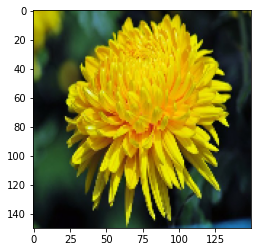

In [ ]:
pic = image.load_img('/content/hoa-cuc-test.jpg.crdownload', target_size=(150,150)) # độ phân giải tùy ae chọn nhé!
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(pic)))
if np.argmax(model.predict(pic)) == 0:
   print("Hoa Cuc")
if np.argmax(model.predict(pic)) == 1:
   print("Hoa Thược dược")
if np.argmax(model.predict(pic)) == 2:
   print("Hoa Mặt Trời")
if np.argmax(model.predict(pic)) == 3:
   print("Vạn Thọ")
   
y_pred = model.predict(pic)
print(y_pred)

Giá trị dự đoán: 2
Hoa Mặt Trời
[[0.02302215 0.24320829 0.49937817 0.00287265]]


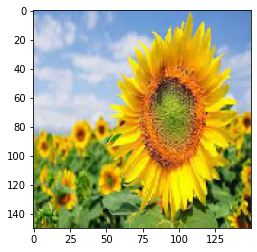

In [ ]:
pic = image.load_img('/content/hoa-cuc-test.jpg.crdownload', target_size=(150,150)) # độ phân giải tùy ae chọn nhé!
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(pic)))
if np.argmax(model.predict(pic)) == 0:
   print("Hoa Cuc")
if np.argmax(model.predict(pic)) == 1:
   print("Hoa Thược dược")
if np.argmax(model.predict(pic)) == 2:
   print("Hoa Mặt Trời")
if np.argmax(model.predict(pic)) == 3:
   print("Vạn Thọ")